## Summary

<p>
The goal of this project is to demonstrate the possibilities of the <a href="https://keras.io/layers/core/">Keras package</a>for image recognition. Keras is an open source deep learning library, which enables
the quick implementation of neural networks. It is a high level interface to the <a href="https://www.tensorflow.org/"> Tensorflow</a> library, a "a free and open-source software library for dataflow and differentiable programming across a range of tasks" (<a href="https://en.wikipedia.org/wiki/TensorFlow">Wikipedia</a>) developed initially by Google. The goal of the project is not 
to develop a best performing model on the Fashion MNIST data set. The number of image processes (epochs) and the 
size of the training data were restricted to decrease the run time and computational intensity and deliver results quickly.
</p> 

<p>
According to <a href="https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/">Zalando Research</a> the "Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28×28 grayscale image, associated with a label from 10 classes." Nowadays it is deemed to easy as to work as a deep learning challenge, but it remains a good
starting point to demonstrate the workflow and functionality of the Keras library.
</p> 

<p>
This project in applies the full basic Keras workflow to the data set. These methods are
applied:
</p>

<ul>
<li><b>Import</b></li>  
<li>installing and importing Tensorflow and Keras</li>
<li>data import</li>
<li><b>Preparing some tools and methods</b></li> 
<li>representing images with data</li>
<li>turning 3d color images into 2d gray images</li>
<li>one-hot-encoding by writing code</li>
<li>encoding using sklearn</li>
<li>encoding using keras</li>    
<li>clarify the principle of evaluation (of a classifier)</li>    
<li><b>Modeling a sample of the Fashion MNIST data set
</b></li>   
<li> Taking a random sample of the fashion dataset</li>    
<li> Model the sample data with sequential Convolutional Neural Networks (CNN)</li>    
<li>Calculating simple convolutions by coding</li>    
<li>Determining one dimensional convolutions</li>
<li>Determining two dimensional convolutions</li>
<li>Creating different kernels</li>
<li>Determining convolutions using keras</li>
<li>Tuning the parameters of the keras model</li>
<li>Creating a deep learning convolutional network</li>
<li>Convolution layers</li>
<li>Comparing the number of parmeters of a convolutional and dense network</li>
<li>Flatten layers</li>
<li>Pooling layers</li>
<li>Observing learning performance</li>
<li>Callbacks</li>
<li>Regularization</li>
<li>Dropout layer</li>
<li>BatchNormalization</li>
<li><b>Model the complete data set as a sequential Convolutional Neural Network (CNN)</b></li>
</ul>

<p>
Comments are and explanations are given within the coding.
</p> 



#### Working directory

In [387]:
import os 
dirpath = os.getcwd()
foldername = os.path.basename(dirpath)
print(foldername)



imageprocessing


## Import packages

In [388]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from PIL import Image

plt.rcParams['font.size'] = 11
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.family'] = 'monospace'

import numpy as np
print("numpy version: ", np.__version__)
import scipy.stats
import math
import os
import types
from random import sample
from random import choices
import random
import warnings

import sklearn
from sklearn.pipeline import Pipeline
print("SKlearn version: ", sklearn.__version__)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder




numpy version:  1.16.4
SKlearn version:  0.21.2


In [389]:
import tensorflow as tf

In [390]:
print("tensorflow version: ", tf.__version__)

tensorflow version:  1.14.0


In [391]:
tf.keras.__version__

'2.2.4-tf'

In [392]:
from tensorflow import keras

In [393]:
print("keras version: ", keras.__version__)

keras version:  2.2.4-tf


In [394]:
# import keras
# print("keras version: ", keras.__version__)

In [395]:
from keras.utils import to_categorical
from keras.models import Sequential
# The Sequential model is a linear stack of layers.
from keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization
# every unit in the layer is connected to every unit in the previous layer
# https://keras.io/getting-started/sequential-model-guide/
from keras.datasets import fashion_mnist
from keras.callbacks import ModelCheckpoint

import keras.preprocessing


<p>
At first some tools and methods are developed necessary to conduct the main work flow later on.
</p> 

#### Representing images with data

<p>
In Python images are represented with numbers as a numpy matrix.
The matplotlib library can deduct those numbers for example from
images stored in the format PNG. How does the matrix look like?
</p> 

<p>The returned array has shape</p> 

<ul>
<li>(M, N) for grayscale images</li>
<li>(M, N, 3) for RGB images</li>
<li>(M, N, 4) for RGBA images</li>
</ul>

<p>(M, N, 3): M rows, N columns, number of elements</p> 

        
        
        




(624, 800, 4)
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


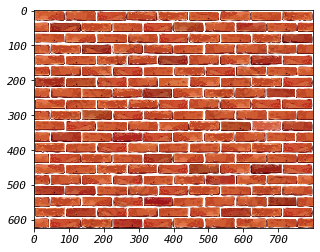

In [396]:
brick_data = plt.imread('bricks.png')
print(brick_data.shape)
print(brick_data[:1])
# 624 rows or images, 800 columns or pixels, number of elements: 4
# every row is an image
# every column is the intensity of a pixel
# the rows - hight and columns - width are coordinates for the spacial 
# location of the image.
# hight and width make the size of an image
# the third dimension is the color (RGB) channel
plt.imshow(brick_data)
plt.show()

#### Manipulating image color.
<p>
Red: 0, Green: 1, Blue: 2 - channel are accessed using the numpy array.
Setting the the channel Red: 0 and the other 0 paints the section [:100,:100,0]  red.
</p> 


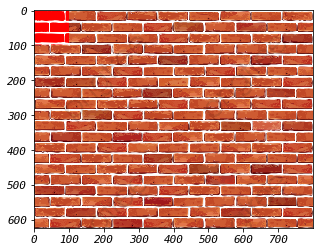

In [397]:
# manipulating the color of the section 100 / 100
brick_data_2 = brick_data.copy()
brick_data_2[:100,:100,0] = 1
brick_data_2[:100,:100,1] = 0
brick_data_2[:100,:100,2] = 0
plt.imshow(brick_data_2)
plt.show()

(2000, 2000, 4)
[0.2784314  0.4392157  0.29803923 0.        ]


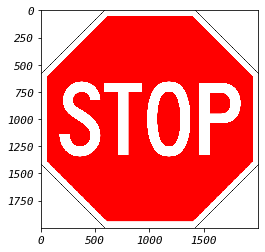

In [398]:
stop_data = plt.imread('trafficsign_stop.png')
print(stop_data.shape)
print(stop_data[100][1])
plt.imshow(stop_data)
plt.show()

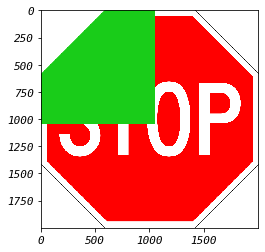

In [399]:
# manipulating the color of the section 1050 / 1050
stop_data_2 = stop_data.copy()
stop_data_2[:1050,:1050,0] = 0.1
stop_data_2[:1050,:1050,1] = 0.8
stop_data_2[:1050,:1050,2] = 0.1
plt.imshow(stop_data_2)
plt.show()

(600, 600, 4)
[0. 0. 0. 0.]


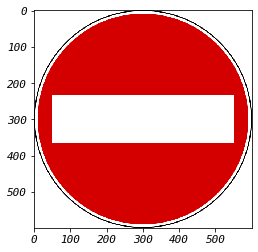

In [400]:
warning_data = plt.imread('trafficsign_noentry.png')
print(warning_data.shape)
print(warning_data[500][2])
plt.imshow(warning_data)
plt.show()

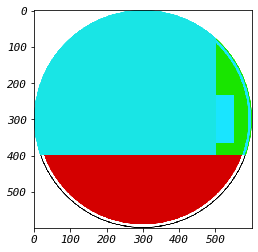

In [401]:
# manipulating the color of the section 1050 / 1050
warning_data_2 = warning_data.copy()
warning_data_2[:400,:600,0] = 0.1
warning_data_2[:400,:600,1] = 0.9
warning_data_2[:400,:500,2] = 0.9
plt.imshow(warning_data_2)
plt.show()

#### Turning 3d color images into 2d gray images

(1096, 1096, 4)


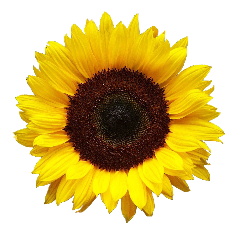

(1096, 1096)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


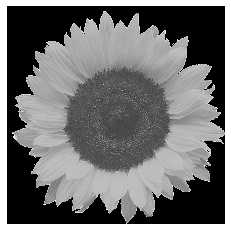

In [402]:
sunflower = plt.imread('Sunflower-PNG-HD.png')
print(sunflower.shape)
plt.imshow(sunflower)
plt.axis('off')
plt.show()

sf_intensity = sunflower.sum(axis=2)
plt.imshow(sf_intensity, cmap='gray')
plt.axis('off')
print(sf_intensity.shape)
print(sf_intensity )

(2000, 2000, 4)


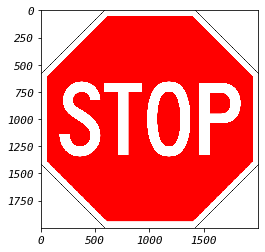

(2000, 2000, 4)
(2000, 2000)


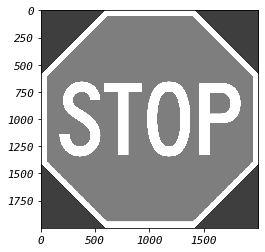

In [403]:
trafficsign_stop = plt.imread('trafficsign_stop.png')
print(trafficsign_stop.shape)
plt.imshow(trafficsign_stop)
plt.show()
print(trafficsign_stop.shape)


trafficsign = plt.imread('trafficsign_stop.png')
sf_trafficsign = trafficsign.sum(axis=2)
plt.imshow(sf_trafficsign, cmap='gray')
print(sf_trafficsign.shape)

#### One-hot-encoding by writing code

In [404]:
labels = np.repeat(["shirt", "dress", "shoe"], 6)
print(labels)
print(len(labels))

# The number of image categories
n_types = 3 # types: ["shirt", "dress", "shoe"]

# The unique values of categories in the data
types = np.array(["shirt", "dress", "shoe"])

# creates an array of zeros of precise shape for storing labels

ohe_labels = np.zeros((len(labels), n_types))
# generates m=18, n = 3
print(ohe_labels.shape)
print(ohe_labels[2])

print(np.where(labels == 'shoe'))
print(labels[np.where(labels == 'shoe')])

['shirt' 'shirt' 'shirt' 'shirt' 'shirt' 'shirt' 'dress' 'dress' 'dress'
 'dress' 'dress' 'dress' 'shoe' 'shoe' 'shoe' 'shoe' 'shoe' 'shoe']
18
(18, 3)
[0. 0. 0.]
(array([12, 13, 14, 15, 16, 17], dtype=int64),)
['shoe' 'shoe' 'shoe' 'shoe' 'shoe' 'shoe']


In [405]:
for i in range(len(labels)):
    j = np.where(types == labels[i])
    ohe_labels[i,j] = 1
    
print(ohe_labels)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


#### Encoding using sklearn

In [406]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
print(integer_encoded)

[1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2]


In [407]:
onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)


[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


#### Encoding using keras

In [408]:
# keras needs numerics otherwise throws an error
# https://stackoverflow.com/questions/46323296/
# keras-pad-sequences-throwing-invalid-literal-for-int-with-base-10
labels_2 = labels.copy()
labels_2[np.where(labels_2 == 'shirt')] = 1
labels_2[np.where(labels_2 == 'dress')] = 2
labels_2[np.where(labels_2 == 'shoe')] = 3
print(labels_2)

['1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3']


In [409]:
encoded = keras.utils.to_categorical(labels_2)
print(encoded)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


#### Clarify the principle of evaluation (of a classifier)

<p>
Given predictions (made however with a model or classifier)
evaluation is the number of true predictions of all predictions.
This is also called the true positive rate or the hit rate,
sensitivity or recall.
</p> 



In [410]:
predictions =np.asarray ([[0, 0, 1,],
             [0, 1, 0,],
             [0, 0, 1,],
             [1, 0, 0,],
             [0, 0, 1,],
             [1, 0, 0,],
             [0, 0, 1,],
             [0, 1, 0,]])

test_labels = np.asarray ([[0, 0, 1,],
               [0, 1, 0,],
               [0, 0, 1,],
               [0, 1, 0,],
               [0, 0, 1,],
               [0, 0, 1,],
               [0, 0, 1,],
               [0, 1, 0,]])

print(predictions)
print(test_labels)

[[0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]]
[[0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]]


In [411]:
accurate_predictions = (predictions * test_labels).sum() 
proportion_accurates = accurate_predictions / len(predictions)

print(accurate_predictions )
print(proportion_accurates)

6
0.75


### Modeling a sample of the Fashion MNIST data set

<p>Fashion-MNIST is a dataset of Zalando’s article images 
consisting of a training set of 60,000 examples and a 
test set of 10,000 examples. Each example is a 28×28 grayscale
image, associated with a label from 10 classes. 
Fashion-MNIST is intended to serve as a direct 
drop-in replacement of the original MNIST dataset for
benchmarking machine learning algorithms.</br>
<a href="https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/">
Zalando Reasearch</a>
</p> 

<p>Nowadays it is deemed to easy but deliver a good starting point for applying keras methods.</p> 


In [412]:
# importing the fashion mnist data set
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

# shapes?
for i in [trainX, trainY, testX, testY]:
    print(type(i))
    print(i.shape)

# 60.000 rows = images, square size of 28*28 pixels, colorchannel: grayscale

<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)
<class 'numpy.ndarray'>
(10000, 28, 28)
<class 'numpy.ndarray'>
(10000,)


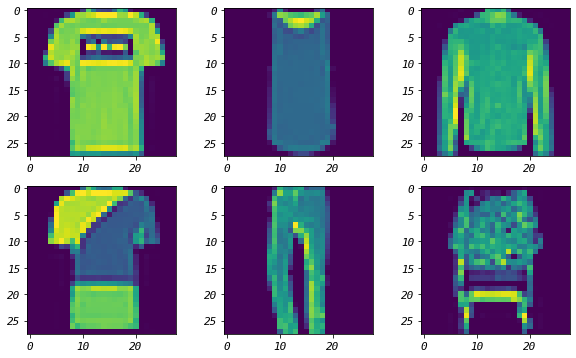

In [413]:
# take a look at the images

figure, ax = plt.subplots(2,3, figsize=(10,6))

ax[0,0].imshow(trainX[1])
ax[0,1].imshow(trainX[2])
ax[0,2].imshow(trainX[203])

ax[1,0].imshow(trainX[504])
ax[1,1].imshow(trainX[10145])
ax[1,2].imshow(trainX[23090])

plt.show()

#### Taking a random sample of the fashion dataset

<p>
As the data set contain 60.000 images it will need more processing time.
That is why a small random sample of 50 images is taken to model the data
more easily.
</p> 

In [414]:
np.random.seed(0)
idx_50_trainX = np.random.randint(0,len(trainX), size=200)
print(len(idx_50_trainX))
print(idx_50_trainX)

np.random.seed(1)
idx_50_testY = np.random.randint(0,len(testY), size=200)
print(len(idx_50_testY))
print(idx_50_testY)

sample_50_trainX = trainX[idx_50_trainX]
sample_50_trainY = trainY[idx_50_trainX ]

sample_50_testX = testX[idx_50_testY]
sample_50_testY = testY[idx_50_testY]

print(sample_50_trainX.shape)
print(sample_50_trainY.shape)

print(sample_50_testX.shape)
print(sample_50_testY.shape)

# 50 images of size 28 to 28

200
[ 2732 43567 42613 52416 45891 21243 30403 32103 41993 57043 20757 55026
 46884 14935 15430 48600 39512 52620 14650 17089 32230 18983 43095 51374
 24152 35665 59045 16921 27469 38984  6921 38804  2163  5072 37619  7877
 18430  1871  7599  2496 47954 24675 42968 31921 33523   797 49811  3219
 15246 24999 56608 16321 52489 19129 53887 41504 55839 49866 18676 57495
 31230 11723 43890 17591 55324 58146 43136 26752 59300 23605  6021 20006
  3560 25332 31055 45444 50793 46522 47647 21368 20737 28647 26681 14627
 12134 47883 41390 56402 20571 59790 51811  9781 19340 27257 16298 12372
 51403  4420 45830 39876 17455 14324 38019  7012  9396 47080  3918  9359
 50836 44259 23482 15127 43727 35725 37237 14165  8752 42565 14505  5795
 50624 23647 40133 28254 41216 55153 36530 59298 25392 16221 18819 34402
 48682   973 20848 10215 11157 24777 59775 13824  2418 12843 13242 36223
 55319 54971  6521 22626 56894  9123 31454 42947 55890 14254 51939 23700
 37073 51762 38299 23310 31785 15041 56356 2330

Important: the shape is not 2 but 3 dimensional, 50 images
of shape 28\*28. Keras expects rows to represent images and
columns to represent pixel in a 2 dimensional array.
Using this data in a model requires therefore to reshape
the data to two dimensions. 
The dimensions are: (50, 28\*28 = 784).
784 pixels are represented by 784 columns.

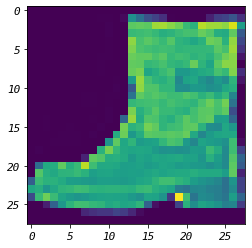

In [415]:
plt.imshow(sample_50_trainX[49])

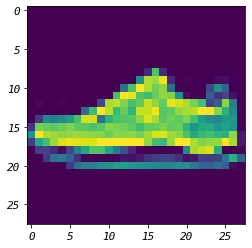

In [416]:
plt.imshow(sample_50_testX[21])

#### Model the sample data with sequential Convolutional Neural Networks (CNN)

<p>
The sequential model is a stack of linear layers. 
The first layer is a dense or a fully connected network, where
every unit  of the current layer is connected 
with every unit of the previous layer
The layer builds 10 = 10 units or nodes.
More units create models with greater complexity
This can increase overfitting. 
Adding dropout layers and thereby reducing the nummber of connections can reduce the overfitting.
</p> 


In [417]:
# one-hot encoding the training and testing labels
sample_50_trainY_enc = keras.utils.to_categorical(sample_50_trainY, num_classes=10)
sample_50_testY_enc = keras.utils.to_categorical(sample_50_testY, num_classes=10)

print(sample_50_trainY_enc[:10])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [418]:
model1 = Sequential()

model1.add(Dense(10, activation='relu', input_shape=(784,)))
model1.add(Dense(10, activation='relu'))
# Output layer
# the output layer must have 10 outputs, 
# one output for each fashion item 
# this is a multiclassification problem
# the softmax functions decides which fashion item was presented
# from the previous input layer
model1.add(Dense(10, activation='softmax'))

In [419]:
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [420]:
# reshaping the data because the keras model algorithm expects
# a 2 dimensional array of shape (M,n)
sample_50_trainX_reshaped = sample_50_trainX.reshape((200, 784))
print(sample_50_trainX_reshaped.shape)

sample_50_testX_reshaped = sample_50_testX.reshape((200, 784))
print(sample_50_testX_reshaped.shape)

(200, 784)
(200, 784)


The model will create layer by layer through connecting nodes
till the output nodes are reached using the relu activation function
to modify weights in forward propagation.
The model then adjust the weights through gradient descent in 
backward propagation.
The processing of the training data is done three times (3 epochs).
Increasing the number of epochs can enhance the accuracy of the model but
is also computational challenging.

In [421]:
model1.fit(sample_50_trainX_reshaped,sample_50_trainY_enc,
          validation_split=0.2, epochs=3)

Train on 160 samples, validate on 40 samples
Epoch 1/3
160/160 [==============================] - 8s 52ms/step - loss: 13.3053 - acc: 0.1250 - val_loss: 11.8967 - val_acc: 0.2500
Epoch 2/3
160/160 [==============================] - 0s 344us/step - loss: 13.0097 - acc: 0.1687 - val_loss: 10.5556 - val_acc: 0.3250
Epoch 3/3
160/160 [==============================] - 0s 493us/step - loss: 12.7352 - acc: 0.1938 - val_loss: 10.6814 - val_acc: 0.3000


The validation accuracy is with 0.2 rather low. This was expected as the data set is small 
and the processing was done only 3 times.

In [422]:
model1.evaluate(sample_50_testX_reshaped, sample_50_testY_enc)
# loss: 13.79217903137207
# accuracy: 0.14000000029802323

200/200 [==============================] - 0s 235us/step


[13.175267143249512, 0.14]

### Calculating simple convolutions by coding

<p>    
Pixels of an image are often correlated to other pixels at a contour or edge of a shape. Convolutions are same features (orientation of an edge, color of a contour ...) at different locations of an image. 
Features are expressed as an array of numbers. 
The term 'kernel' also expressed as an array represents here the feature we are looking.
As boths are arrays features and kernel can be compared and overlaps determined.
The convolution of an image is determined by multiplying the feature array with
a given kernel and then building the sum of the resulting array. 
A simple example illustrating the process is given below.
</p> 

In [423]:
# feature array - feature given
feature_1 = np.array([np.repeat(0,repeats=5), np.repeat(1,repeats=5)]).flatten()
print(feature_1)
print(len(feature_1))
print(feature_1[0:2])

np.random.seed(0)
feature_2 = np.random.randint(0,2, size=10)
print(feature_2)
print(len(feature_2))
print(feature_2[0:2])

# kernel array - representing feature searched for
# the features searched for is of len 2
kernel = np.array([-1, 1])
print(kernel)
print(len(kernel))

# compare feature array 1 with kernel
convolution_1 = (kernel*feature_1[0:2]).sum()
# 0*-1 + 01*1 = 0
print('convolution_1: ', convolution_1)
convolution_2 = (kernel*feature_1[7:9]).sum()
# 0*-1 + 0*1 = 0
print('convolution_2: ', convolution_2)

# compare feature array 2 with kernel
convolution_5 = (kernel*feature_2[1:3]).sum()
# 1*-1 + 1*1 = 0
print('convolution_5: ', convolution_5)
convolution_6 = (kernel*feature_2[7:9]).sum()
# 1*-1 + 1*1 = 0
print('convolution_6: ', convolution_6)

[0 0 0 0 0 1 1 1 1 1]
10
[0 0]
[0 1 1 0 1 1 1 1 1 1]
10
[0 1]
[-1  1]
2
convolution_1:  0
convolution_2:  0
convolution_5:  0
convolution_6:  0


#### Determining one dimensional convolutions

In [424]:
def slide_kernel_along_feature(kernel, feature):
    convolutions = np.zeros(len(feature), dtype=int)
    for i in range(len(feature)):
        convolutions[i] = (kernel*feature[i:i+2]).sum()

    return convolutions

In [425]:
convolutions_1 = slide_kernel_along_feature(kernel, feature_1)
print(convolutions_1 )

convolutions_2 = slide_kernel_along_feature(kernel, feature_2)
print(convolutions_2 )

[0 0 0 0 1 0 0 0 0 0]
[ 1  0 -1  1  0  0  0  0  0  0]


#### Determining two dimensional convolutions

(600, 600)


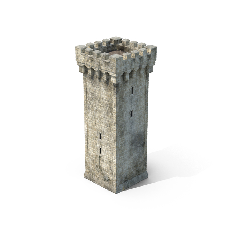

(600, 600)

In [426]:
tower = plt.imread('tower.jpg')
intensity_tower = tower.sum(axis=2)
print(intensity_tower.shape)
# cmap='gray' works only with a 3d array
plt.imshow(intensity_tower, cmap='gray')
plt.imshow(tower, cmap='gray')
plt.axis('off')
plt.show()
intensity_tower.shape

In [427]:
print(intensity_tower.shape[0] - 3)
print(intensity_tower.shape[1] - 3)

597
597


In [428]:
# two-dimensional-kernel: 3 rows, 3 columns
kernel_2_dim = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
print(kernel_2_dim.shape)

convol_9 = np.zeros(intensity_tower.shape)
print(convol_9.shape)

(3, 3)
(600, 600)


In [429]:
rows_1 = intensity_tower.shape[0] - 3
cols_1 = intensity_tower.shape[1] - 3

for row in range(rows_1):
    for col in range(cols_1):
        convol_9[row, col] = (kernel_2_dim * intensity_tower[row:row+3, col:col+3]).sum()

In [430]:
print(convol_9.shape)
print(convol_9[100:120])


(600, 600)
[[3825. 3825. 3825. ...    0.    0.    0.]
 [3825. 3825. 3825. ...    0.    0.    0.]
 [3825. 3825. 3825. ...    0.    0.    0.]
 ...
 [3825. 3825. 3825. ...    0.    0.    0.]
 [3825. 3825. 3825. ...    0.    0.    0.]
 [3825. 3825. 3825. ...    0.    0.    0.]]


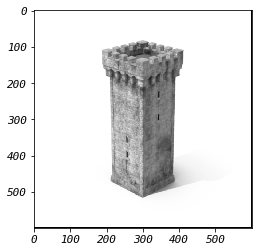

In [431]:
plt.imshow(convol_9, cmap='gray')
plt.show()

In [432]:
# develop a function to determine convolutions

def convolutions(image, kernel_2_dim):
        
    # turn a 3d image into a 2d image
    intensity_image = image.sum(axis=2)
    
    # make an empty list of a specified shape
    convol_list = np.zeros(intensity_image.shape)
    
    rows_1 = intensity_image.shape[0] - 3
    cols_1 = intensity_image.shape[1] - 3
    
    # make an array of features consisting of rows and columns
    for row in range(rows_1):
        for col in range(cols_1):
            # calculating convolution by sliding the kernel along the feature array
            convol_list[row, col] = (kernel_2_dim * intensity_image[row:row+3, col:col+3]).sum()
        
    return convol_list
    

#### Creating different kernels

<p>
Kernels are numpy arrays that are used to find a special feature in an image.
The number in an array represents pixels. A dark pixel is represented by the number -1.
A bright pixel is represented by the number 1. Combinations of 1 and -1 in an array
define light and dark arrays in an image.
</p> 

In [433]:
# dark spot surrounded by bright pixels.
kernel_55 = np.array([[1, 1, 1], 
                     [1, -1, 1],
                     [1, 1, 1]])

# bright spot surrounded by dark pixels.
kernel_66 = np.array([[-1, -1, -1], 
                      [-1, 1, -1],
                      [-1, -1, -1]])

# a vertical line consisting of dark pixel surrounded by bright pixel
kernel_77 = np.array([[1, -1, 1], 
                      [1, -1, 1],
                      [1, -1, 1]])

(600, 600)


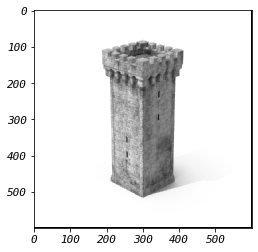

In [434]:
convolutions_55 = convolutions(tower, kernel_55)
print(convolutions_55.shape)
plt.imshow(convolutions_55, cmap='gray')
plt.show()

(600, 600)


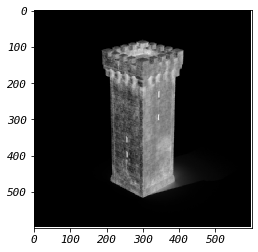

In [435]:
convolutions_66 = convolutions(tower, kernel_66)
print(convolutions_66.shape)
plt.imshow(convolutions_66, cmap='gray')
plt.show()

(600, 600)


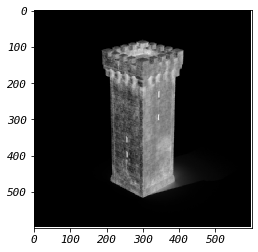

In [436]:
convolutions_77 = convolutions(tower, kernel_77)
print(convolutions_77.shape)
plt.imshow(convolutions_66, cmap='gray')
plt.show()

### Determining convolutions using keras

In [437]:
sample_50_trainX_2 = np.expand_dims(sample_50_trainX, axis=3)
print(sample_50_trainX_2.shape )

sample_50_testX_2 = np.expand_dims(sample_50_testX, axis=3)
print(sample_50_testX_2.shape )

(200, 28, 28, 1)
(200, 28, 28, 1)


In [438]:
print(sample_50_trainX_2.shape)
image_rows_1 = sample_50_trainX_2.shape[1]
print(image_rows_1 )
image_cols_1 = sample_50_trainX_2.shape[2]
print(image_cols_1)

(200, 28, 28, 1)
28
28


In [439]:
# initalizing the model
keras_model = Sequential()

# create the layers
# generates convolution by applying the kernel to the image features
# kernel is fluently adapted with back propagation
# one weight per pixel in the kernel
keras_model.add(Conv2D(10, activation='relu', kernel_size=3, 
                       # 3*3 = 9 pixels / 9*10 units = 90 weights
                       input_shape=(image_rows_1, image_cols_1, 1)))
# intermediary layers takes the output of the Conv2D 
# and turns 2d into a one dimensional array (flatten)
keras_model.add(Flatten())
# one weight for every pixel in the image
# output 10 for ten fashion items (multiclass problem)
keras_model.add(Dense(10, activation='softmax'))

# compile the model
keras_model.compile(optimizer='adam' , 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])

# keras expect one hot encoded labels (sample_50_trainY_enc)
# otherwise it generates an error
keras_model.fit(sample_50_trainX_2, sample_50_trainY_enc, 
                validation_split=0.2, epochs=10,
                batch_size=10)

Train on 160 samples, validate on 40 samples
Epoch 1/10
160/160 [==============================] - 6s 38ms/step - loss: 14.3061 - acc: 0.1125 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 2/10
160/160 [==============================] - 0s 2ms/step - loss: 14.4055 - acc: 0.1063 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 3/10
160/160 [==============================] - 0s 2ms/step - loss: 14.4055 - acc: 0.1063 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 4/10
160/160 [==============================] - 0s 2ms/step - loss: 14.4055 - acc: 0.1063 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 5/10
160/160 [==============================] - 0s 2ms/step - loss: 14.4055 - acc: 0.1063 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 6/10
160/160 [==============================] - 0s 2ms/step - loss: 14.4055 - acc: 0.1063 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 7/10
160/160 [==============================] - 0s 2ms/step - loss: 14.4055 - acc: 0.1063 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 8/10
160/1

In [440]:
# evaluate the model with the accuracy metric
keras_model.evaluate(sample_50_testX_2, sample_50_testY_enc)

200/200 [==============================] - 0s 515us/step


[14.26451416015625, 0.115]

The accuracy is rather low. More epochs lead to a higher accuracy. 
The tweaking of other parameters effects the accuracy.
On a larger data set this might helpt to increase the accuracy.

In [441]:
keras_model.summary()
# three layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_104 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
flatten_50 (Flatten)         (None, 6760)              0         
_________________________________________________________________
dense_82 (Dense)             (None, 10)                67610     
Total params: 67,710
Trainable params: 67,710
Non-trainable params: 0
_________________________________________________________________


In [442]:
# first layer: 10 units * 9 kernels + 10 bias terms
parameters_1 = 10*9 + 10
print(parameters_1)

# output layer: 6760 pixels * 10 units + 10 bias terms
parameters_out = 6760*10+10
print(parameters_out)

total_parameters = parameters_1 + parameters_out
print(total_parameters)

100
67610
67710


#### Tuning the parameters of the keras model

In [443]:
# padding adds 0 around the edges of the input image
# the kernel can thereby overlap with the pixels on the edge of the image
# and keep the resolution

keras_model_2 = Sequential()
keras_model_2.add(Conv2D(10, activation='relu', kernel_size=3,
                        input_shape = (image_rows_1, image_cols_1, 1),
                        # output = input
                        padding='same'))
keras_model_2.add(Flatten())
keras_model_2.add(Dense(10, activation='softmax'))
keras_model_2.compile(optimizer='adam',
                      loss = 'categorical_crossentropy',
                      metrics=['accuracy'])
keras_model_2.fit(sample_50_trainX_2, sample_50_trainY_enc, 
                validation_split=0.2, epochs=5,
                batch_size=10)
keras_model_2.evaluate(sample_50_testX_2, sample_50_testY_enc)

Train on 160 samples, validate on 40 samples
Epoch 1/5
160/160 [==============================] - 5s 29ms/step - loss: 14.5458 - acc: 0.0938 - val_loss: 15.3122 - val_acc: 0.0500
Epoch 2/5
160/160 [==============================] - 0s 2ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 15.3122 - val_acc: 0.0500
Epoch 3/5
160/160 [==============================] - 0s 2ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 15.3122 - val_acc: 0.0500
Epoch 4/5
160/160 [==============================] - 0s 2ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 15.3122 - val_acc: 0.0500
Epoch 5/5
200/200 [==============================] - 0s 565us/step


[14.345104713439941, 0.11]

In [444]:
keras_model_2.summary()
keras_model_2.layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 28, 28, 10)        100       
_________________________________________________________________
flatten_51 (Flatten)         (None, 7840)              0         
_________________________________________________________________
dense_83 (Dense)             (None, 10)                78410     
Total params: 78,510
Trainable params: 78,510
Non-trainable params: 0
_________________________________________________________________


In [445]:
# using the strides argument the kernel will skip over any other pixel 
# the greater strides the more the kernel centers on only some pixels
# the stride argument adusts the output of Conv2D layer

keras_model_3 = Sequential()
keras_model_3.add(Conv2D(10, activation='relu', kernel_size=3,
                        input_shape = (image_rows_1, image_cols_1, 1),
                        # output = input
                        strides=2))
keras_model_3.add(Flatten())
keras_model_3.add(Dense(10, activation='softmax'))
keras_model_3.compile(optimizer='adam',
                      loss = 'categorical_crossentropy',
                      metrics=['accuracy'])
keras_model_3.fit(sample_50_trainX_2, sample_50_trainY_enc, 
                validation_split=0.3, epochs=5,
                batch_size=10)
keras_model_3.evaluate(sample_50_testX_2, sample_50_testY_enc)

Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 5s 38ms/step - loss: 13.6171 - acc: 0.1286 - val_loss: 14.9302 - val_acc: 0.0667
Epoch 2/5
140/140 [==============================] - 0s 2ms/step - loss: 13.0054 - acc: 0.1786 - val_loss: 14.7752 - val_acc: 0.0833
Epoch 3/5
140/140 [==============================] - 0s 2ms/step - loss: 13.3019 - acc: 0.1643 - val_loss: 15.0436 - val_acc: 0.0667
Epoch 4/5
140/140 [==============================] - 0s 1ms/step - loss: 12.7833 - acc: 0.2000 - val_loss: 15.0436 - val_acc: 0.0667
Epoch 5/5
200/200 [==============================] - 0s 310us/step


[13.680452919006347, 0.145]

In [446]:
keras_model_3.summary()
keras_model_3.layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 13, 13, 10)        100       
_________________________________________________________________
flatten_52 (Flatten)         (None, 1690)              0         
_________________________________________________________________
dense_84 (Dense)             (None, 10)                16910     
Total params: 17,010
Trainable params: 17,010
Non-trainable params: 0
_________________________________________________________________


The output of Conv2D can be calculated.
Given an input I of size 350 by 350, with a 
kernel K of size 6 by 6, padding P of 2 and strides S of 3
the output is:

In [447]:
((350 - 6 + 2*2) / 3)+1

117.0

### Creating a deep learning convolutional network

<p>
is a network with a least two convolutional layers. 
Only the first layer expects the input shape.
The other layer inference the input shape.
Before the inputs are handed over to the output layer
the shape is flattened.
</p> 

In [448]:
keras_model_4 = Sequential()
keras_model_4.add(Conv2D(15, 
                         kernel_size=2, 
                         activation='relu',
                         input_shape=(image_rows_1, image_cols_1, 1)))
keras_model_4.add(Conv2D(5,
                         kernel_size=2,
                         activation='relu'))
keras_model_4.add(Flatten())
keras_model_4.add(Dense(10, activation='softmax'))
keras_model_4.compile(optimizer='adam', 
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
keras_model_4.fit(sample_50_trainX_2, sample_50_trainY_enc, 
                  validation_split=0.3, epochs=5)
keras_model_4.evaluate(sample_50_testX_2, sample_50_testY_enc)

Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 5s 36ms/step - loss: 14.4049 - acc: 0.1000 - val_loss: 12.6191 - val_acc: 0.2000
Epoch 2/5
140/140 [==============================] - 0s 2ms/step - loss: 14.2760 - acc: 0.1143 - val_loss: 12.8504 - val_acc: 0.2000
Epoch 3/5
140/140 [==============================] - 0s 2ms/step - loss: 14.2760 - acc: 0.1143 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 4/5
140/140 [==============================] - 0s 2ms/step - loss: 14.2760 - acc: 0.1143 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 5/5
200/200 [==============================] - 0s 596us/step


[14.586876106262206, 0.095]

In [449]:
keras_model_4.summary()
keras_model_4.layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_107 (Conv2D)          (None, 27, 27, 15)        75        
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 26, 26, 5)         305       
_________________________________________________________________
flatten_53 (Flatten)         (None, 3380)              0         
_________________________________________________________________
dense_85 (Dense)             (None, 10)                33810     
Total params: 34,190
Trainable params: 34,190
Non-trainable params: 0
_________________________________________________________________


In [450]:
# second layer: 10 units * 9 kernels * 10 convolutions + 10 bias terms
parameters_2 = 10*9*10 + 10
print(parameters_2)

910


In [451]:
# Calculating parameters
print(15*4+15)
print(15*4*5+5)
print(3380*10+10)
print((15*4+15) + (15*4*5+5) + (3380*10+10))

75
305
33810
34190


#### Comparing the number of parmeters of a convolutional and dense network

In [452]:
keras_model_5 = Sequential()
keras_model_5.add(Dense(15, 
                         activation='relu',
                         input_shape=(28*28, )))
keras_model_5.add(Dense(5,
                         activation='relu'))
keras_model_5.add(Dense(10, activation='softmax'))
keras_model_5.compile(optimizer='adam', 
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])


keras_model_5.fit(sample_50_trainX_reshaped, sample_50_trainY_enc, 
                  validation_split=0.3, epochs=5)
keras_model_5.evaluate(sample_50_testX_reshaped, sample_50_testY_enc)

keras_model_5.summary()

Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 6s 40ms/step - loss: 11.8456 - acc: 0.1857 - val_loss: 12.4667 - val_acc: 0.0833
Epoch 2/5
140/140 [==============================] - 0s 293us/step - loss: 9.5295 - acc: 0.2000 - val_loss: 7.9981 - val_acc: 0.2333
Epoch 3/5
140/140 [==============================] - 0s 421us/step - loss: 6.8378 - acc: 0.2071 - val_loss: 8.8181 - val_acc: 0.1500
Epoch 4/5
140/140 [==============================] - 0s 407us/step - loss: 6.4061 - acc: 0.2429 - val_loss: 6.3727 - val_acc: 0.2333
Epoch 5/5
200/200 [==============================] - 0s 205us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 15)                11775     
_________________________________________________________________
dense_87 (Dense)             (None, 5)                 80        
_________________________

A dense network has more parameters at the beginning - 11775 - and a 
convolutional network at the end - 33810. Convolutions reduce 
the numbers of parameters necessary at first, but then at then when
delivering to the output more parameters are necessary. The intuition
behind this is that layer by layer more features were identified.

#### Pooling layers

<p>
are modifying the output of a layer in a compressed form.
In case of maximum pooling only the maximum pixel value of a feature 
within a given kernel is returned.
The goal of pooling is to reduce the number of parameters and
thereby decrease overfitting, speed up processing time and
increase performance, when the sample size is rather small.
</p> 

In [453]:
print(tower.shape)
print(tower.shape[0])
print(tower.shape[1])

rows_pool = tower.shape[0]//2
print(rows_pool)
print(type(rows_pool))
cols_pool = tower.shape[1]//2
print(cols_pool)

(600, 600, 3)
600
600
300
<class 'int'>
300


Principal procedure of pooling.

In [454]:
pooling_layer = np.zeros((rows_pool, cols_pool))
print(type(pooling_layer[0]))
print(pooling_layer.shape)
print(pooling_layer[0:3, 0:4])

<class 'numpy.ndarray'>
(300, 300)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [455]:
for row in range(tower.shape[0]//2):
    for col in range(tower.shape[1]//2):
        pooling_layer[row, col] = np.max(tower[row*2:row*2+2,
                                               col*2:col*2+2])
        
print(pooling_layer[0:3, 0:3])
print(pooling_layer[10:13, 10:13])

[[255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]]
[[255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]]


In [456]:
keras_model_6 = Sequential()
keras_model_6.add(Conv2D(20, kernel_size=2, activation='relu', 
                         input_shape = (image_rows_1, image_cols_1, 1)))
# pool_size: integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal). (2, 2) will halve the input in both spatial dimension. 
# If only one integer is specified, the same window length will be used for both dimensions.
keras_model_6.add(MaxPool2D(pool_size=2))
keras_model_6.add(Conv2D(5, kernel_size=2, activation='relu'))
keras_model_6.add(MaxPool2D(pool_size=2))
keras_model_6.add(Flatten())
keras_model_6.add(Dense(10, activation='softmax'))

print(keras_model_6.summary())
print(keras_model_6.layers[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (None, 27, 27, 20)        100       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 12, 12, 5)         405       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 6, 6, 5)           0         
_________________________________________________________________
flatten_54 (Flatten)         (None, 180)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 10)                1810      
Total params: 2,315
Trainable params: 2,315
Non-trainable params: 0
_________________________________________________________________
None


Compared to similar models before with 10th of thousands parameters this model has
only 2,315 parameters.

In [457]:
keras_model_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy' ])
train_6 = keras_model_6.fit(sample_50_trainX_2, sample_50_trainY_enc, 
                            validation_split=0.2, epochs=10)
keras_model_6.evaluate(sample_50_testX_2, sample_50_testY_enc)
# loss, accuracy, mae - mean absolute error

Train on 160 samples, validate on 40 samples
Epoch 1/10
160/160 [==============================] - 6s 40ms/step - loss: 13.6388 - acc: 0.1000 - val_loss: 13.4710 - val_acc: 0.0750
Epoch 2/10
160/160 [==============================] - 0s 2ms/step - loss: 12.9567 - acc: 0.1375 - val_loss: 11.1707 - val_acc: 0.2750
Epoch 3/10
160/160 [==============================] - 0s 2ms/step - loss: 12.3504 - acc: 0.1625 - val_loss: 10.9802 - val_acc: 0.2750
Epoch 4/10
160/160 [==============================] - 0s 2ms/step - loss: 11.2744 - acc: 0.2063 - val_loss: 9.8424 - val_acc: 0.2250
Epoch 5/10
160/160 [==============================] - 0s 2ms/step - loss: 9.7661 - acc: 0.2250 - val_loss: 8.6448 - val_acc: 0.2750
Epoch 6/10
160/160 [==============================] - 0s 2ms/step - loss: 8.8701 - acc: 0.3188 - val_loss: 8.1622 - val_acc: 0.2500
Epoch 7/10
160/160 [==============================] - 0s 2ms/step - loss: 8.2786 - acc: 0.3375 - val_loss: 7.9287 - val_acc: 0.2250
Epoch 8/10
160/160 [===

[7.900642623901367, 0.31]

### Observing learning performance
<p>
Keras stores the validation loss, loss and validation accuracy for each epoch. 
Those can be used for visualizing the learning performance over all epochs.
</p> 

In [458]:
keras_history_6 = train_6.history
keras_history_6

{'val_loss': [13.47104606628418,
  11.170716667175293,
  10.980225944519043,
  9.842428207397461,
  8.644779777526855,
  8.162151050567626,
  7.928734397888183,
  7.674822044372559,
  7.2784675598144535,
  6.92434024810791],
 'val_acc': [0.075,
  0.275,
  0.275,
  0.225,
  0.275,
  0.25,
  0.225,
  0.25,
  0.325,
  0.325],
 'loss': [13.638783073425293,
  12.956695365905762,
  12.350371932983398,
  11.274427795410157,
  9.766124725341797,
  8.87009506225586,
  8.278598594665528,
  7.812753391265869,
  7.442617034912109,
  7.171162223815918],
 'acc': [0.1,
  0.1375,
  0.1625,
  0.20625,
  0.225,
  0.31875,
  0.3375,
  0.36875,
  0.4125,
  0.4625]}

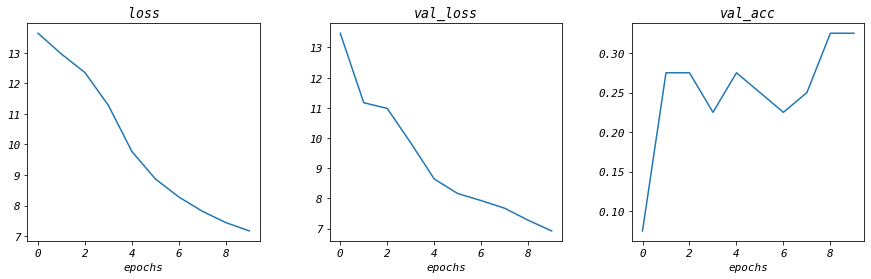

In [459]:
figure, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4), sharex=True)
plt.subplots_adjust(wspace=0.3)

ax1.plot(keras_history_6['loss'])
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax2.plot(keras_history_6['val_loss'])
ax2.set_title('val_loss')
ax2.set_xlabel('epochs')
ax3.plot(keras_history_6['val_acc'])
ax3.set_title('val_acc')
ax3.set_xlabel('epochs')

plt.show()

Keras offers a convenient method to save the parameters of the epoch, which produces the best performance
evaluated by a metric like validation loss. The epochs work as a checkpoint for storing the weights.
As the fit method offers also an argument callback the parameters can be used in a second step to generate a model
with the best weights determined in the first run of the model. Furthermore the load.weights method makes it
possible to populate an untrained model and then make predictions on a test set.

In [460]:
# This checkpoint object will store the model parameters 
# in the file "weights.hdf5"
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss',
save_best_only=True)
# Store in a list to be used during training
callbacks_list = [checkpoint]


In [461]:
keras_model_7 = keras_model_6

# Fit the model on a training set, using the checkpoint as a 
#callback
keras_model_7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy' ])
keras_model_7.fit(sample_50_trainX_2, sample_50_trainY_enc, 
                            validation_split=0.2, epochs=10, callbacks=callbacks_list)
keras_model_7.evaluate(sample_50_testX_2, sample_50_testY_enc)

Train on 160 samples, validate on 40 samples
Epoch 1/10
160/160 [==============================] - 8s 47ms/step - loss: 7.1015 - acc: 0.4562 - val_loss: 6.7423 - val_acc: 0.2750
Epoch 2/10
160/160 [==============================] - 0s 2ms/step - loss: 6.9135 - acc: 0.4937 - val_loss: 6.4704 - val_acc: 0.3500
Epoch 3/10
160/160 [==============================] - 0s 2ms/step - loss: 6.7471 - acc: 0.5312 - val_loss: 6.1102 - val_acc: 0.3750
Epoch 4/10
160/160 [==============================] - 0s 2ms/step - loss: 6.6294 - acc: 0.5438 - val_loss: 5.9942 - val_acc: 0.4500
Epoch 5/10
160/160 [==============================] - 0s 2ms/step - loss: 6.5567 - acc: 0.5625 - val_loss: 5.8988 - val_acc: 0.5000
Epoch 6/10
160/160 [==============================] - 0s 3ms/step - loss: 6.4802 - acc: 0.5563 - val_loss: 5.8131 - val_acc: 0.4250
Epoch 7/10
160/160 [==============================] - 1s 4ms/step - loss: 6.4220 - acc: 0.5687 - val_loss: 5.6450 - val_acc: 0.5000
Epoch 8/10
160/160 [==========

[7.251342658996582, 0.4]

In [462]:
keras_model_7.load_weights('weights.hdf5')
keras_model_7.predict_classes(sample_50_testX_2[:10])

array([2, 8, 4, 7, 4, 5, 3, 3, 4, 2], dtype=int64)

### Regularization 
<p>
to prevent overfitting by adding a dropout layer that excludes a subset of units
from the output. This slows down the learning rate and decreases overfitting thereby.
Otherwise batch normalization rescales the output of the previous layer to have
a mean of 0 and a standard deviation of 1. This increases the learning rate most of 
of the times. BatchNormalization and Dropout do not fit well together often.
</p> 

#### Dropout layer

In [463]:
keras_model_8 = Sequential()
keras_model_8.add(Conv2D(15, kernel_size=2, activation='relu', 
                         input_shape=(image_rows_1, image_cols_1, 1)))
keras_model_8.add(Dropout(0.2))
keras_model_8.add(Conv2D(5, kernel_size=2, activation='relu'))
keras_model_8.add(Flatten())
keras_model_8.add(Dense(10, activation='softmax'))

keras_model_8.summary()
keras_model_8.layers

keras_model_8.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
keras_model_8.fit(sample_50_trainX_2, sample_50_trainY_enc, epochs=5, validation_split=0.2)
keras_model_8.evaluate(sample_50_testX_2, sample_50_testY_enc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 27, 27, 15)        75        
_________________________________________________________________
dropout_33 (Dropout)         (None, 27, 27, 15)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 26, 26, 5)         305       
_________________________________________________________________
flatten_55 (Flatten)         (None, 3380)              0         
_________________________________________________________________
dense_90 (Dense)             (None, 10)                33810     
Total params: 34,190
Trainable params: 34,190
Non-trainable params: 0
_________________________________________________________________
Train on 160 samples, validate on 40 samples
Epoch 1/5
160/160 [==============================] - 6s 35ms/step - loss: 13.3420 - acc: 0.15

[12.5721146774292, 0.22]

#### BatchNormalization

In [464]:
keras_model_9 = Sequential()
keras_model_9.add(Conv2D(15, kernel_size=2, activation='relu',
                         input_shape=(image_rows_1, image_cols_1, 1)))
keras_model_9.add(BatchNormalization())
keras_model_9.add(Conv2D(5, kernel_size=2, activation='relu'))
keras_model_9.add(Flatten())
keras_model_9.add(Dense(10, activation='softmax'))
keras_model_9.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
keras_model_9.fit(sample_50_trainX_2, sample_50_trainY_enc, epochs=5, validation_split=0.2)
keras_model_8.evaluate(sample_50_testX_2, sample_50_testY_enc)

Train on 160 samples, validate on 40 samples
Epoch 1/5
160/160 [==============================] - 7s 46ms/step - loss: 2.5795 - acc: 0.2063 - val_loss: 1.5003 - val_acc: 0.4750
Epoch 2/5
160/160 [==============================] - 0s 3ms/step - loss: 0.9525 - acc: 0.6813 - val_loss: 1.0849 - val_acc: 0.6250
Epoch 3/5
160/160 [==============================] - 0s 2ms/step - loss: 0.5151 - acc: 0.8688 - val_loss: 0.8966 - val_acc: 0.7250
Epoch 4/5
160/160 [==============================] - 0s 2ms/step - loss: 0.3090 - acc: 0.9250 - val_loss: 0.7568 - val_acc: 0.7250
Epoch 5/5
200/200 [==============================] - 0s 650us/step


[12.5721146774292, 0.22]

#### Model the complete data set as a sequential Convolutional Neural Network (CNN)

One-hot-encoding of the target variables or lables.

In [465]:
print(trainY[:10])
print(np.unique(trainY, axis=0))
print(len(np.unique(trainY, axis=0)))

[9 0 0 3 0 2 7 2 5 5]
[0 1 2 3 4 5 6 7 8 9]
10


In [466]:
# one-hot encoding the training and testing labels
trainY_2 = keras.utils.to_categorical(trainY, num_classes=10)
testY_2 = keras.utils.to_categorical(testY, num_classes=10)

print(trainY_2[:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [467]:
print(trainY_2.shape)
print(testY_2.shape)

(60000, 10)
(10000, 10)


In [468]:

trainX_2 = trainX.reshape((trainX.shape[0], 28, 28, 1))
print(trainX.shape[0])
print(trainX_2.shape)
print(trainX.shape)

testX_2 = testX.reshape((testX.shape[0], 28, 28, 1))
print(testX.shape[0])
print(testX_2.shape)
print(testX.shape)

60000
(60000, 28, 28, 1)
(60000, 28, 28)
10000
(10000, 28, 28, 1)
(10000, 28, 28)


In [469]:
# determining input shape by multiplying the s
28*28

784

In [470]:
from keras.layers import Activation,Conv2D,MaxPooling2D,Flatten
num_classes = 10
model2 = Sequential()
model2.add(Conv2D(32,(3,3),padding='same',input_shape=trainX_2.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(32,(3,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(rate=0.25))
model2.add(Conv2D(64,(3,3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64,(3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(rate=0.25))
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [471]:
model2.compile(optimizer='adam',
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

In [472]:
model2.fit(trainX_2, trainY_2, validation_split=0.2, epochs=6)

Train on 48000 samples, validate on 12000 samples
Epoch 1/9
48000/48000 [==============================] - 519s 11ms/step - loss: 14.4994 - acc: 0.1003 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 2/9
48000/48000 [==============================] - 520s 11ms/step - loss: 14.4996 - acc: 0.1004 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 3/9
48000/48000 [==============================] - 565s 12ms/step - loss: 14.4996 - acc: 0.1004 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 4/9
48000/48000 [==============================] - 569s 12ms/step - loss: 14.4996 - acc: 0.1004 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 5/9
48000/48000 [==============================] - 543s 11ms/step - loss: 14.4996 - acc: 0.1004 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 6/9
48000/48000 [==============================] - 585s 12ms/step - loss: 14.4996 - acc: 0.1004 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 7/9
48000/48000 [==============================] - 576s 12ms/step - loss: 14.4996 - acc: 0.1004 - val_lo

In [473]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_115 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
activation_31 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_32 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 13, 13, 64)        18496     
__________

In [474]:
model2.evaluate(testX_2, testY_2)
# loss: 11.722690777587891
# accuracy: 0.2727]

10000/10000 [==============================] - 22s 2ms/step


[14.506285681152344, 0.1]

In [475]:
model2_history = model2.history
print(model2_history)